# Importing Library

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import date
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Reading Dataset

In [31]:
df = pd.read_csv(r"E:\MSBAN\4. FALL 2023\Capstone\Dataset\Procurement_ On_Time_Delivery_INV_WSU.csv")

In [32]:
df.head(5)

,PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,...,SHORT_TEXT,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM
0,5500903136,20180907,CN15,V4014,29078,NaN,10.0,2.100008e+09,Custom Manufacturing,1.0,...,994 45 1327A TU E 3.50-8.00 27DB 4036,1016.0,20181128.0,20181122.0,20181116.0,20181116.0,183615169.0,900001.0,52.0,2023-05-30T23:07:43.64Z
1,5500903075,20180907,CN20,8010095928,201206,NaN,20.0,NaN,Tanks and Process Equipment,NaN,...,卧式10 gal 碳钢气罐+不锈钢接头+一个安全阀,1032.0,NaN,0.0,20180928.0,20180928.0,NaN,0.0,0.0,2023-05-30T23:07:43.64Z
2,5500903659,20180907,CA10,8010003146,L6L 6R2,NaN,10.0,1.100126e+09,Piping & Tubing,1.0,...,"DISC RUPTURE BS-B-JRS 3"" 41PSIG/518F",4036.0,NaN,20181205.0,20181112.0,20181001.0,NaN,0.0,24.0,2023-05-30T23:07:43.64Z
3,5500903322,20180907,CA10,8010005836,N2C 0B7,NaN,180.0,NaN,Material Handling,NaN,...,M6-1.0 x 16mm ISO 4762 Hex Drive Class 1,4036.0,20180907.0,20180918.0,20180908.0,20180908.0,NaN,0.0,0.0,2023-05-30T23:07:43.64Z
4,5500903320,20180907,CA10,8010005836,N2C 0B7,NaN,60.0,NaN,Material Handling,NaN,...,"3/4"" x 2.000"" OD Low Carbon Zinc Finish",4036.0,20180907.0,20180918.0,20180908.0,20180908.0,NaN,0.0,0.0,2023-05-30T23:07:43.64Z


# Dataset Shape

In [33]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 1139407 rows and 21 columns


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139407 entries, 0 to 1139406
Data columns (total 21 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   PURCHASE_DOCUMENT_ID                    1139407 non-null  int64  
 1   CREATE_DATE                             1139407 non-null  int64  
 2   COMPANY_CODE_ID                         1139392 non-null  object 
 3   VENDOR_ID                               940595 non-null   object 
 4   POSTAL_CD                               939036 non-null   object 
 5   RELEASE_DATE                            63554 non-null    float64
 6   PURCHASE_DOCUMENT_ITEM_ID               1139392 non-null  float64
 7   MATERIAL_ID                             618888 non-null   float64
 8   SUB_COMMODITY_DESC                      1138367 non-null  object 
 9   MRP_TYPE_ID                             574879 non-null   float64
 10  MRP_TYPE_DESC_E               

# Managing Duplicates

In [35]:
duplicates = df.duplicated().sum()
print(f'The dataset has total of {duplicates} duplicated rows')

The dataset has total of 77174 duplicated rows


In [36]:
# the duplicated rows
duplicated_rows = df[df.duplicated()]
duplicated_rows.head(5)

,PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,...,SHORT_TEXT,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM
145,5100093848,20180907,GB10,NaN,NaN,NaN,10.0,2.100018e+09,Resins & Polymers,2.0,...,"NYLON 6,6 FLAKE MY02 BT",3024.0,NaN,20180907.0,20180907.0,20180907.0,183544954.0,10.0,0.0,2021-11-08T03:52:05.27Z
185,5100093850,20180907,GB10,NaN,NaN,NaN,10.0,2.100015e+09,Resins & Polymers,2.0,...,PA66 U5101 NC01 BT,3024.0,NaN,20180907.0,20180907.0,20180907.0,183545166.0,10.0,0.0,2021-11-08T03:52:05.27Z
231,5100093872,20180907,US10,NaN,NaN,NaN,10.0,2.100009e+09,Custom Manufacturing,1.0,...,1385 64 C635A TU E 4.99-8.62 3X4X 4014,4016.0,20180911.0,20180911.0,20180911.0,20180911.0,183555544.0,900001.0,3.0,2021-11-08T03:52:05.27Z
232,5100093863,20180907,US10,NaN,NaN,NaN,10.0,2.100013e+09,"Additives, Colorants & Catalysts",1.0,...,ADI-PURE® HP AA FFA HPC,4014.0,NaN,20181015.0,20180928.0,20180928.0,183557087.0,10.0,15.0,2023-05-30T23:07:43.64Z
241,5100093877,20180907,US10,NaN,NaN,NaN,10.0,2.100013e+09,"Additives, Colorants & Catalysts",1.0,...,DYTEK® HMD TKR 98%,4014.0,NaN,20181015.0,20180926.0,20180926.0,183556721.0,10.0,14.0,2023-05-30T23:07:43.64Z


Our client want us not to delete all duplicated rows. They want us to keep the duplicates if the duplicates **PURCHASE_DOCUMENT_ID** start with **"51"** and **"76"**.

In [37]:
# making the PURCHASE_DOCUMENT_ID column as string
df['PURCHASE_DOCUMENT_ID'] = df['PURCHASE_DOCUMENT_ID'].astype('str')

In [38]:
# Making a new column for the first two digit of PURCHASE_DOCUMENT_ID
df['1st_two_digit'] = df['PURCHASE_DOCUMENT_ID'].str[:2]

In [39]:
#counting the occurances with first two digit of combination
count_1st_two_digit = df['1st_two_digit'].value_counts()
print(count_1st_two_digit)

55    680722
20    204505
51    198792
60     45631
76      9727
45        23
69         4
86         3
Name: 1st_two_digit, dtype: int64


In [40]:
# deleting duplicated raws
df = df.loc[(df['1st_two_digit'].str.contains('55')) | (df['1st_two_digit'].str.contains('76')) | ~df.duplicated()]

In [41]:
#remaining duplicated raws in dataset
df.duplicated().sum()

26940

# Deleting Unnecessary Column

In [42]:
# printing the columns name
print(df.columns)

Index(['PURCHASE_DOCUMENT_ID', 'CREATE_DATE', 'COMPANY_CODE_ID', 'VENDOR_ID',
       'POSTAL_CD', 'RELEASE_DATE', 'PURCHASE_DOCUMENT_ITEM_ID', 'MATERIAL_ID',
       'SUB_COMMODITY_DESC', 'MRP_TYPE_ID', 'MRP_TYPE_DESC_E', 'SHORT_TEXT',
       'PLANT_ID', 'POR_DELIVERY_DATE', 'FIRST_GR_POSTING_DATE',
       'DELIVERY_DATE', 'REQUESTED_DELIVERY_DATE', 'INBOUND_DELIVERY_ID',
       'INBOUND_DELIVERY_ITEM_ID', 'PLANNED_DELIVERY_DAYS',
       'BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM', '1st_two_digit'],
      dtype='object')


In [43]:
#droping the columns
columns_to_drop = ['PURCHASE_DOCUMENT_ID', 'PURCHASE_DOCUMENT_ITEM_ID', 'SHORT_TEXT', 'INBOUND_DELIVERY_ID',
                   'INBOUND_DELIVERY_ITEM_ID', '1st_two_digit']
df = df.drop(columns = columns_to_drop).copy()

In [44]:
#printing new dataset
df.head(5)

,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,MRP_TYPE_DESC_E,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM
0,20180907,CN15,V4014,29078,NaN,2.100008e+09,Custom Manufacturing,1.0,1.0,1016.0,20181128.0,20181122.0,20181116.0,20181116.0,52.0,2023-05-30T23:07:43.64Z
1,20180907,CN20,8010095928,201206,NaN,NaN,Tanks and Process Equipment,NaN,NaN,1032.0,NaN,0.0,20180928.0,20180928.0,0.0,2023-05-30T23:07:43.64Z
2,20180907,CA10,8010003146,L6L 6R2,NaN,1.100126e+09,Piping & Tubing,1.0,1.0,4036.0,NaN,20181205.0,20181112.0,20181001.0,24.0,2023-05-30T23:07:43.64Z
3,20180907,CA10,8010005836,N2C 0B7,NaN,NaN,Material Handling,NaN,NaN,4036.0,20180907.0,20180918.0,20180908.0,20180908.0,0.0,2023-05-30T23:07:43.64Z
4,20180907,CA10,8010005836,N2C 0B7,NaN,NaN,Material Handling,NaN,NaN,4036.0,20180907.0,20180918.0,20180908.0,20180908.0,0.0,2023-05-30T23:07:43.64Z


# Changing Datatype

In [45]:
#splitting BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM column to extract date column
df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'] = df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'].str.split('T').str[0]

In [46]:
#printing data types
print(df.dtypes)

CREATE_DATE                                 int64
COMPANY_CODE_ID                            object
VENDOR_ID                                  object
POSTAL_CD                                  object
RELEASE_DATE                              float64
MATERIAL_ID                               float64
SUB_COMMODITY_DESC                         object
MRP_TYPE_ID                               float64
MRP_TYPE_DESC_E                           float64
PLANT_ID                                  float64
POR_DELIVERY_DATE                         float64
FIRST_GR_POSTING_DATE                     float64
DELIVERY_DATE                             float64
REQUESTED_DELIVERY_DATE                   float64
PLANNED_DELIVERY_DAYS                     float64
BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM     object
dtype: object


In [47]:
#changing data types
df['CREATE_DATE'] = pd.to_datetime(df['CREATE_DATE'], format = '%Y%m%d')
df['COMPANY_CODE_ID'] = df['COMPANY_CODE_ID'].astype('str')
df['VENDOR_ID'] = df['VENDOR_ID'].astype('str')
df['POSTAL_CD'] = df['POSTAL_CD'].astype('str')
df['RELEASE_DATE'] = pd.to_datetime(df['RELEASE_DATE'], format = '%Y%m%d')
df['MATERIAL_ID'] = df['MATERIAL_ID'].astype('str')
df['SUB_COMMODITY_DESC'] = df['SUB_COMMODITY_DESC'].astype('str')
df['MRP_TYPE_ID'] = df['MRP_TYPE_ID'].astype('str')
df['MRP_TYPE_DESC_E'] = df['MRP_TYPE_DESC_E'].astype('str')
df['PLANT_ID'] = df['PLANT_ID'].astype('str')
df['POR_DELIVERY_DATE'] = pd.to_datetime(df['POR_DELIVERY_DATE'], format = '%Y%m%d')
df['FIRST_GR_POSTING_DATE'] = pd.to_datetime(df['FIRST_GR_POSTING_DATE'], format = '%Y%m%d', errors = 'coerce')
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d', errors='coerce')
df['DELIVERY_DATE'] = pd.to_datetime(df['DELIVERY_DATE'], format = '%Y%m%d')
df['PLANNED_DELIVERY_DAYS'] = df['PLANNED_DELIVERY_DAYS'].astype(pd.Int64Dtype())
df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'] = pd.to_datetime(df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'], format = '%Y-%m-%d')

In [48]:
# printing changed datatype
print(df.dtypes)

CREATE_DATE                               datetime64[ns]
COMPANY_CODE_ID                                   object
VENDOR_ID                                         object
POSTAL_CD                                         object
RELEASE_DATE                              datetime64[ns]
MATERIAL_ID                                       object
SUB_COMMODITY_DESC                                object
MRP_TYPE_ID                                       object
MRP_TYPE_DESC_E                                   object
PLANT_ID                                          object
POR_DELIVERY_DATE                         datetime64[ns]
FIRST_GR_POSTING_DATE                     datetime64[ns]
DELIVERY_DATE                             datetime64[ns]
REQUESTED_DELIVERY_DATE                   datetime64[ns]
PLANNED_DELIVERY_DAYS                              Int64
BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM    datetime64[ns]
dtype: object


In [49]:
df.head(10)

,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,MRP_TYPE_DESC_E,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM
0,2018-09-07,CN15,V4014,29078,NaT,2100007708.0,Custom Manufacturing,1.0,1.0,1016.0,2018-11-28,2018-11-22,2018-11-16,2018-11-16,52,2023-05-30
1,2018-09-07,CN20,8010095928,201206,NaT,nan,Tanks and Process Equipment,nan,nan,1032.0,NaT,NaT,2018-09-28,2018-09-28,0,2023-05-30
2,2018-09-07,CA10,8010003146,L6L 6R2,NaT,1100125572.0,Piping & Tubing,1.0,1.0,4036.0,NaT,2018-12-05,2018-11-12,2018-10-01,24,2023-05-30
3,2018-09-07,CA10,8010005836,N2C 0B7,NaT,nan,Material Handling,nan,nan,4036.0,2018-09-07,2018-09-18,2018-09-08,2018-09-08,0,2023-05-30
4,2018-09-07,CA10,8010005836,N2C 0B7,NaT,nan,Material Handling,nan,nan,4036.0,2018-09-07,2018-09-18,2018-09-08,2018-09-08,0,2023-05-30
5,2018-09-07,CA10,8010003152,L5W 0A1,NaT,1100181639.0,Safety Supplies,1.0,1.0,4036.0,NaT,2018-09-13,2018-09-21,2018-09-21,11,2023-05-30
6,2018-09-07,US10,8010098170,06457,NaT,nan,Consulting Services,nan,nan,4032.0,NaT,NaT,2018-09-17,2018-09-17,0,2023-09-07
7,2018-09-07,CA10,V4058,19973,NaT,2100003822.0,Custom Manufacturing,1.0,1.0,4036.0,2018-11-01,2018-12-03,2018-11-01,2018-11-01,1,2021-11-08
8,2018-09-07,US10,8010005920,29033-3526,NaT,1100084508.0,Valves,1.0,1.0,4014.0,NaT,2018-11-08,2018-09-27,2018-09-27,36,2023-05-30
9,2018-09-07,US10,8010005411,29170-3182,NaT,nan,Electric & Electronics,nan,nan,4014.0,NaT,2018-10-05,2018-10-05,2018-09-28,0,2023-05-30


# EDA

## Univariate Analysis

### CREATE_DATE

In [50]:
#Checking unique values in the column CREATE_DATE
df['CREATE_DATE'].nunique()

1826

In [51]:
#checking the range of date
min_date = df['CREATE_DATE'].min()
max_date = df['CREATE_DATE'].max()

# Print the range of dates
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2018-09-07 00:00:00
Maximum Date: 2023-09-07 00:00:00


In [52]:
# checking number of days between date range
day = max_date - min_date
day

Timedelta('1826 days 00:00:00')

Total unique value of CREATE_DATE column is 1826. The number of days between highest and lowest date is 1826. That means our dataset has value for every date. This is little bit unusual because Holiday should not be included.

In [53]:
#checking is their any null value or value with '0' in our dataset
empty_column = (df['CREATE_DATE'] == '0').any()
NaT_value = df['CREATE_DATE'].isna().any()
nan_Value = (df['CREATE_DATE'] == 'nan').any()
null_day = (df['CREATE_DATE'].dt.day == 0).any()
null_month = (df['CREATE_DATE'].dt.month == 0).any()
null_year = (df['CREATE_DATE'].dt.year == 0).any()

In [54]:
result = pd.DataFrame({'Check': ['empty_column', 'NaT_value', 'nan_Value', 'null_day', 'null_month', 'null_year'],
                     'result': [empty_column, NaT_value, nan_Value, null_day, null_month, null_year]})
print(result.to_string())

          Check  result
0  empty_column   False
1     NaT_value   False
2     nan_Value   False
3      null_day   False
4    null_month   False
5     null_year   False


***Range of dataset***

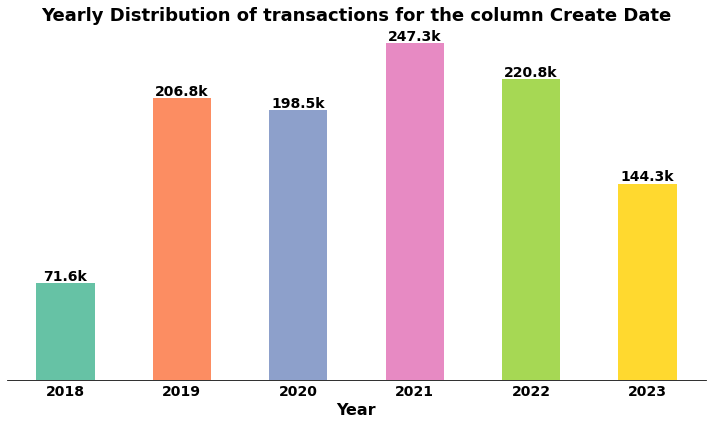

In [56]:
import matplotlib.pyplot as plt

#plotting the CREATE_DATE column as a bar chart
# Calculate yearly counts
yearly_counts = df['CREATE_DATE'].dt.year.value_counts().sort_index()

# Convert counts to thousands
yearly_counts_in_thousands = yearly_counts / 1000

# Define the color
bar_color = sn.color_palette("Set2")

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = yearly_counts_in_thousands.plot(kind='bar', color=bar_color,)
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.title('Yearly Distribution of transactions for the column Create Date', fontsize=18, fontweight='bold')
plt.xticks(rotation=0, fontsize = 14, fontweight = 'bold')

# Remove border lines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Remove tick marks
ax.tick_params(axis='both', which='both', length=0)
ax.set_yticklabels([])
# Remove grid lines
ax.grid(False)
# Display count values on top of the bars
for i, v in enumerate(yearly_counts_in_thousands):
    ax.text(i, v, f'{v:.1f}k', ha='center', va='bottom', fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show()

### COMPANY_CODE_ID

In [57]:
# checking unique value
df['COMPANY_CODE_ID'].nunique()

40

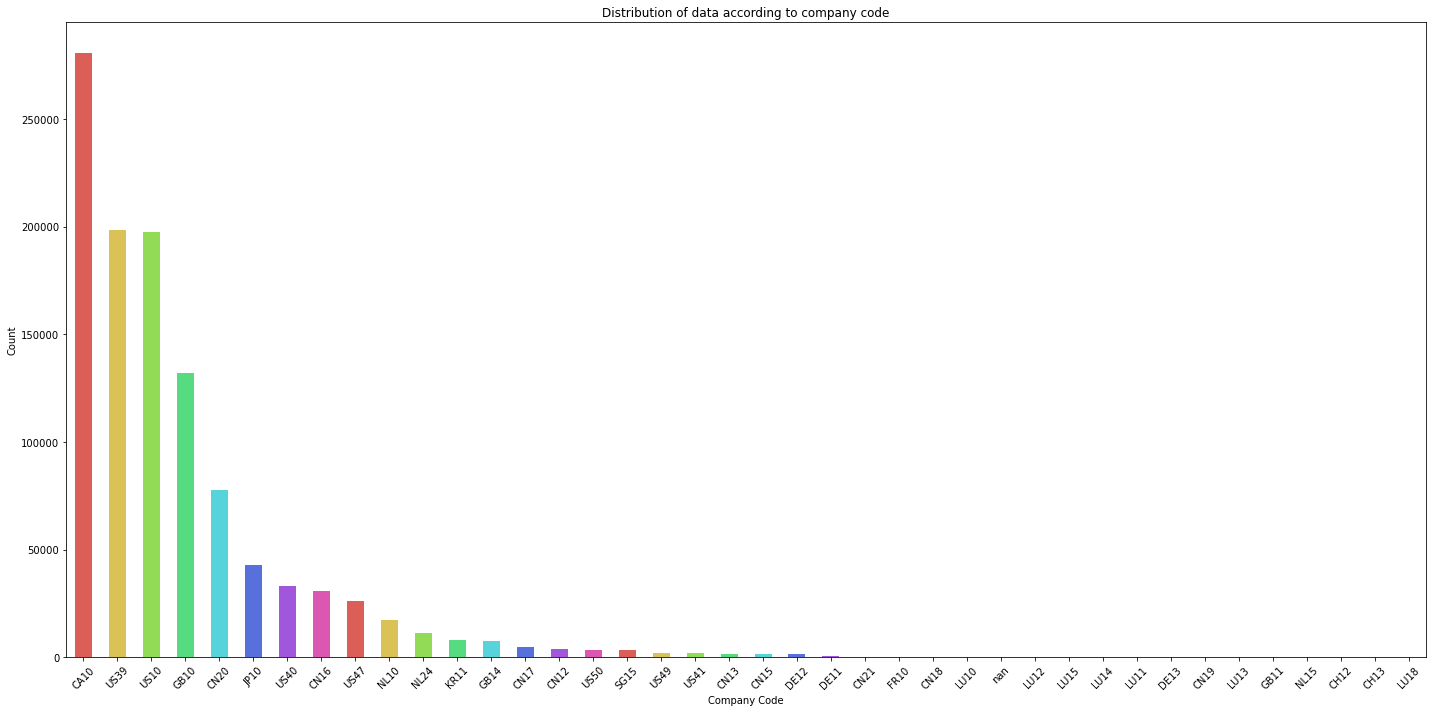

In [58]:
# Transaction Distribution of Company Code
COMPANY_CODE_ID_count = df['COMPANY_CODE_ID'].value_counts()
colors = sn.color_palette("hls", 8)
plt.figure(figsize=(20, 10))
COMPANY_CODE_ID_count.plot(kind='bar', color= colors)
plt.xlabel('Company Code')
plt.ylabel('Count')
plt.title('Distribution of data according to company code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
#value counts of company code
df['COMPANY_CODE_ID'].value_counts()

CA10    280787
US39    198517
US10    197644
GB10    132235
CN20     77704
JP10     42840
US40     33205
CN16     30916
US47     26029
NL10     17274
NL24     11125
KR11      7862
GB14      7704
CN17      4661
CN12      3929
US50      3525
SG15      3514
US49      1897
US41      1888
CN13      1684
CN15      1677
DE12      1469
DE11       502
CN21       297
FR10        95
CN18        63
LU10        27
nan         15
LU12        15
LU15        11
LU14        10
LU11        10
DE13         8
CN19         8
LU13         6
GB11         6
NL15         6
CH12         4
CH13         3
LU18         1
Name: COMPANY_CODE_ID, dtype: int64

### VENDOR_ID

In [60]:
#Checking Unique value
df['VENDOR_ID'].nunique()

6554

In [61]:
#Check for values with space, two words, coma,\ and /
contains_space = df['VENDOR_ID'].str.contains(' ')
contains_two_words = df['VENDOR_ID'].str.split().str.len() == 2
contains_forward_slash = df['VENDOR_ID'].str.contains('/')
contains_backward_slash = df['VENDOR_ID'].str.contains(r'\b\\b')
contains_coma = df['VENDOR_ID'].str.contains(',')
print(f'The Vendor_id column has {contains_space.sum()} value with space')
print(f'The Vendor_id column has {contains_two_words.sum()} value with two word')
print(f'The Vendor_id column has {contains_forward_slash.sum()} value with forward slash')
print(f'The Vendor_id column has {contains_backward_slash.sum()} value with backward slash')
print(f'The Vendor_id column has {contains_coma.sum()} value with coma')

The Vendor_id column has 0 value with space
The Vendor_id column has 0 value with two word
The Vendor_id column has 0 value with forward slash
The Vendor_id column has 0 value with backward slash
The Vendor_id column has 0 value with coma


In [62]:
# Count the number of unique vendors with vendor IDs starting with any of the vendor ID prefixes
First_Three_Digits = df['VENDOR_ID'].str[:3].value_counts()
First_Three_Digits

801    797895
nan    148578
V40     79733
V41     33559
V10     22662
KKC      3362
V30      1646
VUS       943
KEA       528
VKC       126
KKA        80
VCN        26
VCA        17
VGB        16
VYY         1
VDE         1
Name: VENDOR_ID, dtype: int64

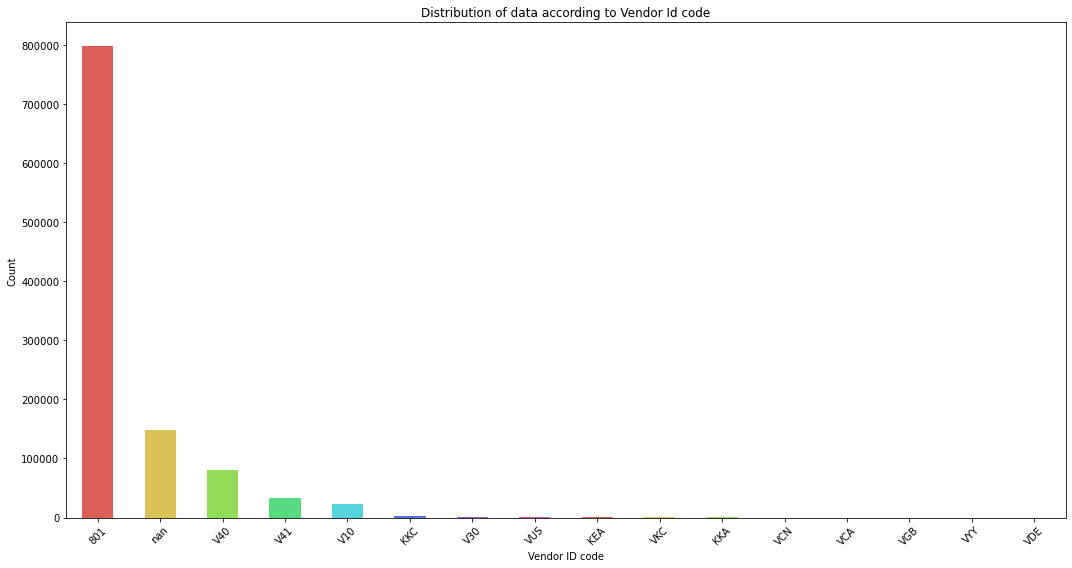

In [63]:
#Plotting with vendor ID code
plt.figure(figsize=(15, 8))
colors = sn.color_palette('hls', 8)
First_Three_Digits.plot(kind='bar', color= colors)
plt.xlabel('Vendor ID code')
plt.ylabel('Count')
plt.title('Distribution of data according to Vendor Id code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### POSTAL_CD

In [64]:
#Checking Unique value
df['POSTAL_CD'].nunique()

5101

In [65]:
#Check for values with space, two words, coma,\ and /
contains_space = df['POSTAL_CD'].str.contains(' ')
contains_two_words = df['POSTAL_CD'].str.split().str.len() == 2
contains_forward_slash = df['POSTAL_CD'].str.contains('/')
contains_backward_slash = df['POSTAL_CD'].str.contains(r'\b\\b')
contains_coma = df['POSTAL_CD'].str.contains(',')
contains_hyphen = df['POSTAL_CD'].str.contains('-')
print(f'The POSTAL_CD column has {contains_space.sum()} value with space')
print(f'The POSTAL_CD column has {contains_two_words.sum()} value with two word')
print(f'The POSTAL_CD column has {contains_forward_slash.sum()} value with forward slash')
print(f'The POSTAL_CD column has {contains_backward_slash.sum()} value with backward slash')
print(f'The POSTAL_CD column has {contains_coma.sum()} value with coma')
print(f'The POSTAL_CD column has {contains_hyphen.sum()} value with hyphen')

The POSTAL_CD column has 297527 value with space
The POSTAL_CD column has 297523 value with two word
The POSTAL_CD column has 0 value with forward slash
The POSTAL_CD column has 0 value with backward slash
The POSTAL_CD column has 0 value with coma
The POSTAL_CD column has 256767 value with hyphen


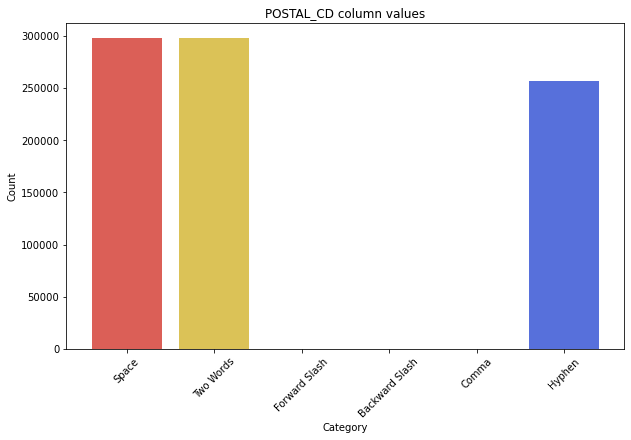

In [66]:
# ploting in bar chart
categories = ['Space', 'Two Words', 'Forward Slash', 'Backward Slash', 'Comma', 'Hyphen']
counts = [contains_space.sum(), contains_two_words.sum(), contains_forward_slash.sum(), contains_backward_slash.sum(), contains_coma.sum(), contains_hyphen.sum()]
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color = colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('POSTAL_CD column values')
plt.xticks(rotation=45)
plt.show()

### RELEASE_DATE

In [67]:
#Checking unique values in the column RELEASE_DATE
df['RELEASE_DATE'].nunique()

1275

In [68]:
#checking the range of date
min_date = df['RELEASE_DATE'].min()
max_date = df['RELEASE_DATE'].max()

# Print the range of dates
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2018-09-07 00:00:00
Maximum Date: 2023-09-07 00:00:00


In [69]:
# checking number of days between date range
day = max_date - min_date
day

Timedelta('1826 days 00:00:00')

In [70]:
#checking is their any null value or value with '0' in our dataset
empty_column = (df['RELEASE_DATE'] == '0').any()
NaT_value = df['RELEASE_DATE'].isna().any()
nan_Value = (df['RELEASE_DATE'] == 'nan').any()
null_day = (df['RELEASE_DATE'].dt.day == 0).any()
null_month = (df['RELEASE_DATE'].dt.month == 0).any()
null_year = (df['RELEASE_DATE'].dt.year == 0).any()

In [71]:
result = pd.DataFrame({'Check': ['empty_column', 'NaT_value', 'nan_Value', 'null_day', 'null_month', 'null_year'],
                     'result': [empty_column, NaT_value, nan_Value, null_day, null_month, null_year]})
print(result.to_string())

          Check  result
0  empty_column   False
1     NaT_value    True
2     nan_Value   False
3      null_day   False
4    null_month   False
5     null_year   False


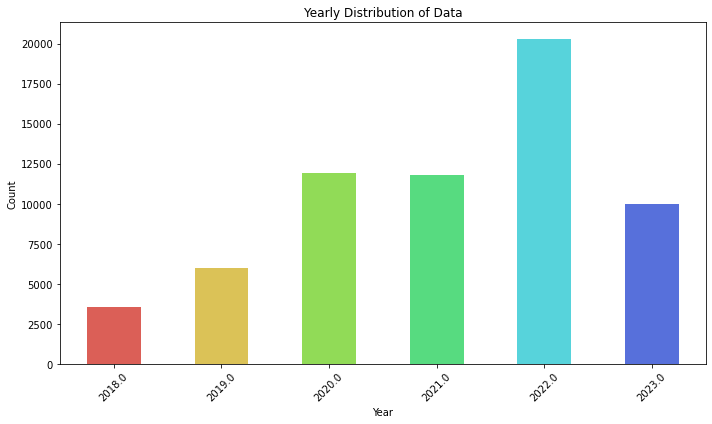

In [72]:
#plotting the RELEASE_DATE column as a bar chart
yearly_counts = df['RELEASE_DATE'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color= colors)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Distribution of Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Material ID

In [74]:
#unique material ID
df['MATERIAL_ID'].nunique()

41720

In [75]:
#null values in Material Id
df['MATERIAL_ID'].str.contains('nan').sum()

520519

In [76]:
#Check for values with space, two words, coma,\ and /
contains_space = df['MATERIAL_ID'].str.contains(' ')
contains_two_words = df['MATERIAL_ID'].str.split().str.len() == 2
contains_forward_slash = df['MATERIAL_ID'].str.contains('/')
contains_backward_slash = df['MATERIAL_ID'].str.contains(r'\b\\b')
contains_coma = df['MATERIAL_ID'].str.contains(',')
contains_hyphen = df['MATERIAL_ID'].str.contains('-')
contains_and = df['MATERIAL_ID'].str.contains('and')
contains_ampersand = df['MATERIAL_ID'].str.contains('&')
print(f'The MATERIAL_ID column has {contains_space.sum()} value with space')
print(f'The MATERIAL_ID column has {contains_two_words.sum()} value with two word')
print(f'The MATERIAL_ID column has {contains_forward_slash.sum()} value with forward slash')
print(f'The MATERIAL_ID column has {contains_backward_slash.sum()} value with backward slash')
print(f'The MATERIAL_ID column has {contains_coma.sum()} value with coma')
print(f'The MATERIAL_ID column has {contains_hyphen.sum()} value with hyphen')
print(f'The MATERIAL_ID column has {contains_and.sum()} value with and')
print(f'The MATERIAL_ID column has {contains_ampersand.sum()} value with &')

The MATERIAL_ID column has 0 value with space
The MATERIAL_ID column has 0 value with two word
The MATERIAL_ID column has 0 value with forward slash
The MATERIAL_ID column has 0 value with backward slash
The MATERIAL_ID column has 0 value with coma
The MATERIAL_ID column has 0 value with hyphen
The MATERIAL_ID column has 0 value with and
The MATERIAL_ID column has 0 value with &


### SUB_COMMODITY_DESC

In [77]:
#Checking Unique value
df['SUB_COMMODITY_DESC'].nunique()

73

In [78]:
#Check for values with space, two words, coma,\ and /
contains_space = df['SUB_COMMODITY_DESC'].str.contains(' ')
contains_two_words = df['SUB_COMMODITY_DESC'].str.split().str.len() == 2
contains_forward_slash = df['SUB_COMMODITY_DESC'].str.contains('/')
contains_backward_slash = df['SUB_COMMODITY_DESC'].str.contains(r'\b\\b')
contains_coma = df['SUB_COMMODITY_DESC'].str.contains(',')
contains_hyphen = df['SUB_COMMODITY_DESC'].str.contains('-')
contains_and = df['SUB_COMMODITY_DESC'].str.contains('and')
contains_ampersand = df['SUB_COMMODITY_DESC'].str.contains('&')
print(f'The SUB_COMMODITY_DESC column has {contains_space.sum()} value with space')
print(f'The SUB_COMMODITY_DESC column has {contains_two_words.sum()} value with two word')
print(f'The SUB_COMMODITY_DESC column has {contains_forward_slash.sum()} value with forward slash')
print(f'The SUB_COMMODITY_DESC column has {contains_backward_slash.sum()} value with backward slash')
print(f'The SUB_COMMODITY_DESC column has {contains_coma.sum()} value with coma')
print(f'The SUB_COMMODITY_DESC column has {contains_hyphen.sum()} value with hyphen')
print(f'The SUB_COMMODITY_DESC column has {contains_and.sum()} value with and')
print(f'The SUB_COMMODITY_DESC column has {contains_ampersand.sum()} value with &')

The SUB_COMMODITY_DESC column has 862176 value with space
The SUB_COMMODITY_DESC column has 407002 value with two word
The SUB_COMMODITY_DESC column has 0 value with forward slash
The SUB_COMMODITY_DESC column has 0 value with backward slash
The SUB_COMMODITY_DESC column has 124028 value with coma
The SUB_COMMODITY_DESC column has 0 value with hyphen
The SUB_COMMODITY_DESC column has 65988 value with and
The SUB_COMMODITY_DESC column has 392073 value with &


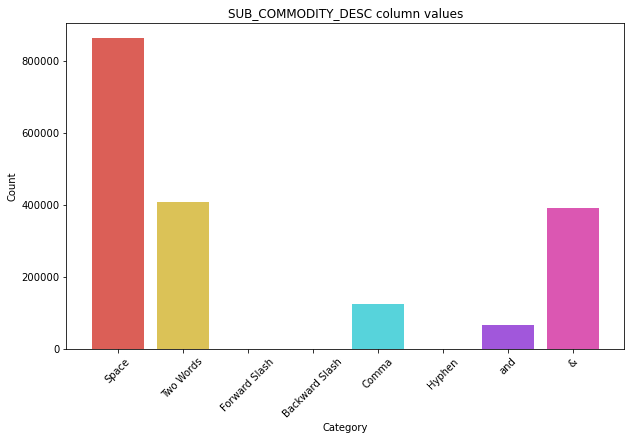

In [79]:
# ploting in bar chart
categories = ['Space', 'Two Words', 'Forward Slash', 'Backward Slash', 'Comma', 'Hyphen', 'and', '&']
counts = [contains_space.sum(), contains_two_words.sum(), contains_forward_slash.sum(), contains_backward_slash.sum(), contains_coma.sum(), contains_hyphen.sum(), contains_and.sum(), contains_ampersand.sum()]
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color = colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('SUB_COMMODITY_DESC column values')
plt.xticks(rotation=45)
plt.show()

### POR_DELIVERY_DATE

In [80]:
#Checking unique values in the column POR_DELIVERY_DATE
df['POR_DELIVERY_DATE'].nunique()

1984

In [81]:
#checking the range of date
min_date = df['POR_DELIVERY_DATE'].min()
max_date = df['POR_DELIVERY_DATE'].max()

# Print the range of dates
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2018-01-07 00:00:00
Maximum Date: 2033-04-25 00:00:00


In [82]:
# checking number of days between date range
day = max_date - min_date
day

Timedelta('5587 days 00:00:00')

In [83]:
#checking is their any null value or value with '0' in our dataset
empty_column = (df['POR_DELIVERY_DATE'] == '0').any()
NaT_value = df['POR_DELIVERY_DATE'].isna().any()
nan_Value = (df['POR_DELIVERY_DATE'] == 'nan').any()
null_day = (df['POR_DELIVERY_DATE'].dt.day == 0).any()
null_month = (df['POR_DELIVERY_DATE'].dt.month == 0).any()
null_year = (df['POR_DELIVERY_DATE'].dt.year == 0).any()

In [84]:
result = pd.DataFrame({'Check': ['empty_column', 'NaT_value', 'nan_Value', 'null_day', 'null_month', 'null_year'],
                     'result': [empty_column, NaT_value, nan_Value, null_day, null_month, null_year]})
print(result.to_string())

          Check  result
0  empty_column   False
1     NaT_value    True
2     nan_Value   False
3      null_day   False
4    null_month   False
5     null_year   False


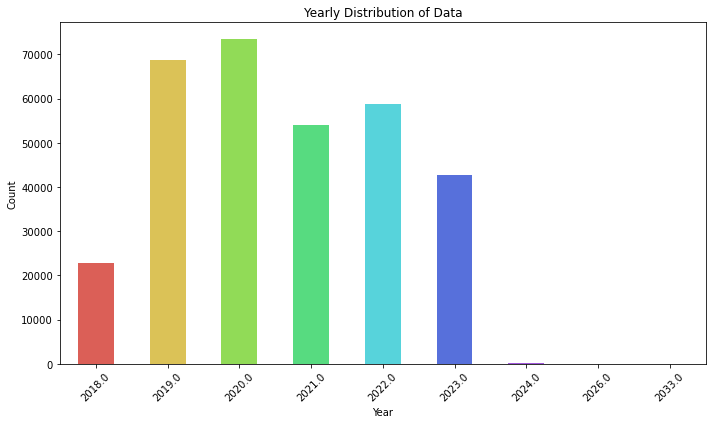

In [85]:
yearly_counts = df['POR_DELIVERY_DATE'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color= colors)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Distribution of Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
#printing the values according to year
print(yearly_counts)

2018.0    22713
2019.0    68684
2020.0    73536
2021.0    53946
2022.0    58750
2023.0    42627
2024.0      101
2026.0        1
2033.0        1
Name: POR_DELIVERY_DATE, dtype: int64


In [87]:
# above data showing we have two rows with for the year 2026 and 2033. this is unusual
# printing the rows of 2026 and 2033
desired_years = [2026, 2033]
filtered_rows = df[df['POR_DELIVERY_DATE'].dt.year.isin(desired_years)]
filtered_rows

,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,MRP_TYPE_DESC_E,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM
1001255,2023-01-18,CA10,8010096209,02835,NaT,2100010934.0,"Additives, Colorants & Catalysts",1.0,1.0,4036.0,2033-04-25,2023-05-05,2023-04-25,2023-04-25,14,2023-05-30
1080551,2023-05-24,US40,8010001749,07054-3713,2023-05-25,nan,"Additives, Colorants & Catalysts",nan,nan,4161.0,2026-06-07,2023-06-07,2023-06-07,2023-06-07,14,2023-07-10


### FIRST_GR_POSTING_DATE

In [88]:
#Checking unique values in the column FIRST_GR_POSTING_DATE
df['FIRST_GR_POSTING_DATE'].nunique()

1829

In [89]:
#checking the range of date
min_date = df['FIRST_GR_POSTING_DATE'].min()
max_date = df['FIRST_GR_POSTING_DATE'].max()

# Print the range of dates
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2018-09-01 00:00:00
Maximum Date: 2023-09-07 00:00:00


In [90]:
# checking number of days between date range
day = max_date - min_date
day

Timedelta('1832 days 00:00:00')

In [91]:
#checking is their any null value or value with '0' in our dataset
empty_column = (df['FIRST_GR_POSTING_DATE'] == '0').any()
NaT_value = df['FIRST_GR_POSTING_DATE'].isna().any()
nan_Value = (df['FIRST_GR_POSTING_DATE'] == 'nan').any()
null_day = (df['FIRST_GR_POSTING_DATE'].dt.day == 0).any()
null_month = (df['FIRST_GR_POSTING_DATE'].dt.month == 0).any()
null_year = (df['FIRST_GR_POSTING_DATE'].dt.year == 0).any()

In [92]:
result = pd.DataFrame({'Check': ['empty_column', 'NaT_value', 'nan_Value', 'null_day', 'null_month', 'null_year'],
                     'result': [empty_column, NaT_value, nan_Value, null_day, null_month, null_year]})
print(result.to_string())

          Check  result
0  empty_column   False
1     NaT_value    True
2     nan_Value   False
3      null_day   False
4    null_month   False
5     null_year   False


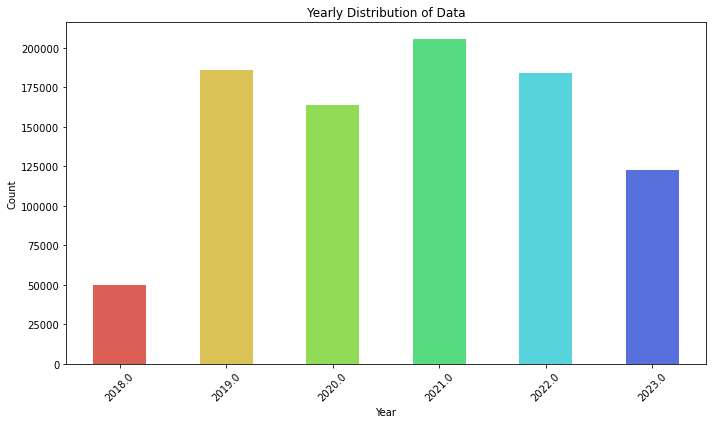

In [94]:
# yearly distribution of column FIRST_GR_POSTING_DATE
yearly_counts = df['FIRST_GR_POSTING_DATE'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color= colors)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Distribution of Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### DELIVERY_DATE

In [95]:
#Checking unique values in the column DELIVERY_DATE
df['DELIVERY_DATE'].nunique()

2331

In [96]:
#checking the range of date
min_date = df['DELIVERY_DATE'].min()
max_date = df['DELIVERY_DATE'].max()

# Print the range of dates
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2002-11-24 00:00:00
Maximum Date: 2038-01-18 00:00:00


In [97]:
# checking number of days between date range
day = max_date - min_date
day

Timedelta('12839 days 00:00:00')

In [98]:
#checking is their any null value or value with '0' in our dataset
empty_column = (df['DELIVERY_DATE'] == '0').any()
NaT_value = df['DELIVERY_DATE'].isna().any()
nan_Value = (df['DELIVERY_DATE'] == 'nan').any()
null_day = (df['DELIVERY_DATE'].dt.day == 0).any()
null_month = (df['DELIVERY_DATE'].dt.month == 0).any()
null_year = (df['DELIVERY_DATE'].dt.year == 0).any()

In [99]:
result = pd.DataFrame({'Check': ['empty_column', 'NaT_value', 'nan_Value', 'null_day', 'null_month', 'null_year'],
                     'result': [empty_column, NaT_value, nan_Value, null_day, null_month, null_year]})
print(result.to_string())

          Check  result
0  empty_column   False
1     NaT_value    True
2     nan_Value   False
3      null_day   False
4    null_month   False
5     null_year   False


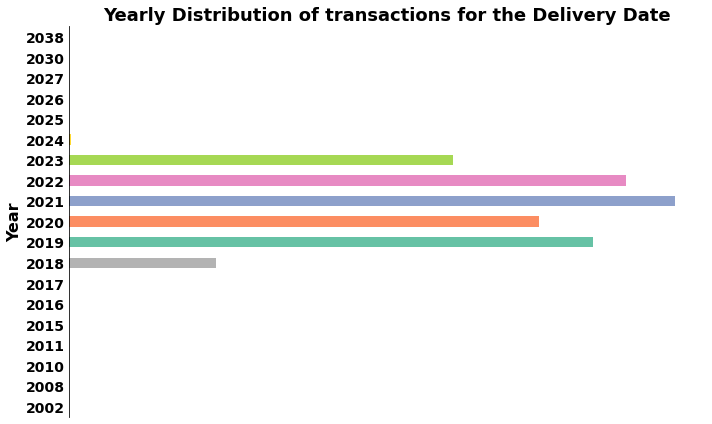

In [100]:
#yearly distribution of delivery date
valid_dates = df['DELIVERY_DATE'].dropna()
yearly_counts = valid_dates.dt.year.astype(int).value_counts().sort_index()

# Convert counts to thousands
yearly_counts_in_thousands = yearly_counts / 1000

# Define the color
bar_color = sn.color_palette("Set2", n_colors=len(yearly_counts_in_thousands))

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = yearly_counts_in_thousands.plot(kind='barh', color=bar_color)

plt.ylabel('Year', fontsize=16, fontweight='bold')
plt.title('Yearly Distribution of transactions for the Delivery Date', fontsize=18, fontweight='bold')
plt.yticks(rotation=0, fontsize = 14, fontweight = 'bold')
plt.xticks([])

# Remove border lines
for spine in ['top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)

# Remove tick marks
ax.tick_params(axis='both', which='both', length=0)

# Remove grid lines
ax.grid(False)

# Display count values beside the bars
#for i, v in enumerate(yearly_counts_in_thousands):
    #ax.text(v, i, f'{v:.1f}k', ha='left', va='center', fontsize=14, fontweight='bold', color='black', fontstyle='italic')

plt.tight_layout()
plt.show()

In [101]:
#printing the values according to year
print(yearly_counts)

2002         1
2008         2
2010         1
2011         1
2015         5
2016        11
2017        20
2018     56978
2019    203298
2020    182319
2021    235033
2022    215971
2023    149076
2024       762
2025        18
2026        18
2027         6
2030         1
2038         1
Name: DELIVERY_DATE, dtype: int64


### REQUESTED_DELIVERY_DATE

In [102]:
#Checking unique values in the column REQUESTED_DELIVERY_DATE
df['REQUESTED_DELIVERY_DATE'].nunique()

2243

In [103]:
#checking the range of date
min_date = df['REQUESTED_DELIVERY_DATE'].min()
max_date = df['REQUESTED_DELIVERY_DATE'].max()

# Print the range of dates
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2001-12-31 00:00:00
Maximum Date: 2038-01-18 00:00:00


In [104]:
# checking number of days between date range
day = max_date - min_date
day

Timedelta('13167 days 00:00:00')

In [105]:
#checking is their any null value or value with '0' in our dataset
empty_column = (df['REQUESTED_DELIVERY_DATE'] == '0').any()
NaT_value = df['REQUESTED_DELIVERY_DATE'].isna().any()
nan_Value = (df['REQUESTED_DELIVERY_DATE'] == 'nan').any()
null_day = (df['REQUESTED_DELIVERY_DATE'].dt.day == 0).any()
null_month = (df['REQUESTED_DELIVERY_DATE'].dt.month == 0).any()
null_year = (df['REQUESTED_DELIVERY_DATE'].dt.year == 0).any()

In [106]:
result = pd.DataFrame({'Check': ['empty_column', 'NaT_value', 'nan_Value', 'null_day', 'null_month', 'null_year'],
                     'result': [empty_column, NaT_value, nan_Value, null_day, null_month, null_year]})
print(result.to_string())

          Check  result
0  empty_column   False
1     NaT_value    True
2     nan_Value   False
3      null_day   False
4    null_month   False
5     null_year   False


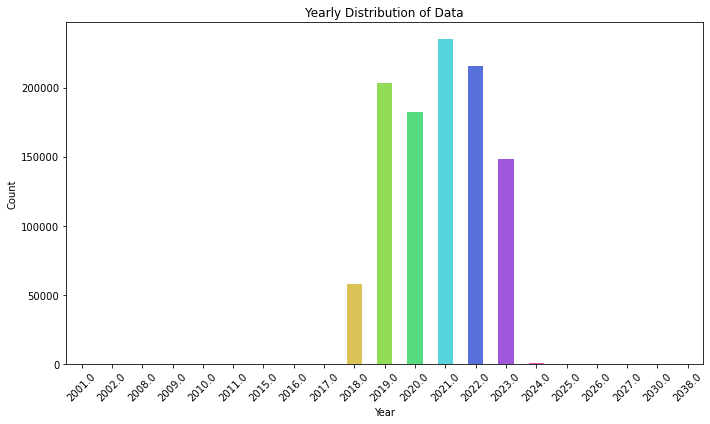

In [107]:
yearly_counts = df['REQUESTED_DELIVERY_DATE'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color= colors)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Distribution of Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [108]:
#printing the values according to year
print(yearly_counts)

2001.0        13
2002.0         2
2008.0         2
2009.0         1
2010.0         1
2011.0         2
2015.0         8
2016.0        15
2017.0        20
2018.0     57612
2019.0    203094
2020.0    182355
2021.0    235352
2022.0    215898
2023.0    148517
2024.0       555
2025.0        17
2026.0        19
2027.0         6
2030.0         2
2038.0         1
Name: REQUESTED_DELIVERY_DATE, dtype: int64


In [109]:
start_date = '2018-09-07'
end_date = '2023-09-07'

filtered_df = df[(df['REQUESTED_DELIVERY_DATE'] < start_date) | (df['REQUESTED_DELIVERY_DATE'] > end_date)]
filtered_df.shape

(10449, 16)

### PLANNED_DELIVERY_DAYS

In [110]:
#Checking unique values in the column PLANNED_DELIVERY_DAYS
df['PLANNED_DELIVERY_DAYS'].nunique()

259

In [111]:
min_value = df['PLANNED_DELIVERY_DAYS'].min()
max_value = df['PLANNED_DELIVERY_DAYS'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0
Maximum value: 999


In [112]:
df['PLANNED_DELIVERY_DAYS'].isna().sum()

15

# BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM

In [114]:
#unique values in column BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM
df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'].nunique()

566

In [115]:
#checking the range of date
min_date = df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'].min()
max_date = df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'].max()

# Print the range of dates
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2021-11-08 00:00:00
Maximum Date: 2023-09-07 00:00:00


In [116]:
# checking number of days between date range
day = max_date - min_date
day

Timedelta('668 days 00:00:00')

In [117]:
#checking is their any null value or value with '0' in our dataset
empty_column = (df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'] == '0').any()
NaT_value = df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'].isna().any()
nan_Value = (df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'] == 'nan').any()
null_day = (df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'].dt.day == 0).any()
null_month = (df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'].dt.month == 0).any()
null_year = (df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'].dt.year == 0).any()

In [118]:
result = pd.DataFrame({'Check': ['empty_column', 'NaT_value', 'nan_Value', 'null_day', 'null_month', 'null_year'],
                     'result': [empty_column, NaT_value, nan_Value, null_day, null_month, null_year]})
print(result.to_string())

          Check  result
0  empty_column   False
1     NaT_value    True
2     nan_Value   False
3      null_day   False
4    null_month   False
5     null_year   False


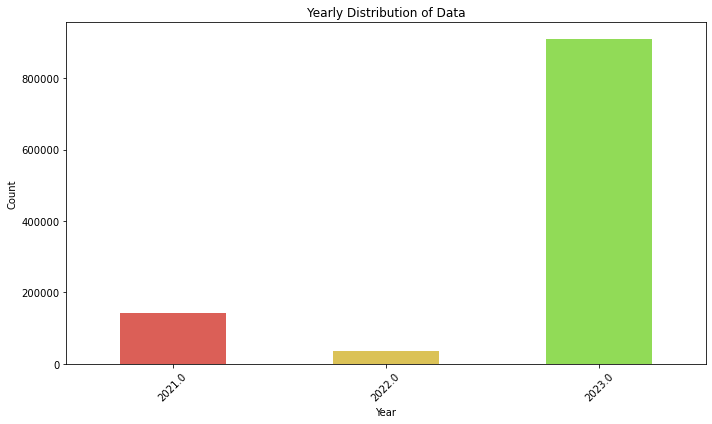

In [119]:
yearly_counts = df['BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color= colors)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Distribution of Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
#yearly distribution
print(yearly_counts)

2021.0    141776
2022.0     36886
2023.0    910496
Name: BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM, dtype: int64


In [122]:
# Exporting csv file
df.to_csv("INVISTA_EAD_3.csv", index = False)